**UNIVERSIDADE DE SÂO PAULO (USP)** \
**Disciplina**: Introdução a Ciência de Dados - SME0828 \
**Docente**: Francisco Aparecido Rodrigues \
**Discente**: Carlos Filipe de Castro Lemos

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests as req
import matplotlib.pyplot as plt

from io import StringIO
from scipy.stats import iqr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [40]:
path_errors = './data/iris-with-errors.csv'
path = './data/iris.csv'

In [41]:
# Selecionando colunas que eventualmente usaremos
col = ['sepal_length','sepal_width','petal_length','petal_width']

# Exercicio 1

In [42]:
# Lendo os dados e substituindo '?' por NaN
iris = pd.read_csv(path_errors, na_values='?')

In [43]:
# Verifica se existem dados duplicados. 
if iris.duplicated().sum() > 0:
    
    # Caso positivo, elimina-os
    iris = iris.drop_duplicates()

In [44]:
# Caso exista valores nulos, elimina tupla
iris = iris.dropna()

In [45]:
# Remoção das duas últimas colunas
iris = iris.iloc[:,:-2]

In [46]:
# Formato final em linhas e colunas
iris.shape

(14, 3)

# Exercicio 2

In [47]:
# Lendo os dados de iris novamente
iris = pd.read_csv(path_errors, na_values='?')

# Substituindo NaN pela media
for column in col:
    iris[column].fillna(iris[column].mean(), inplace=True)

# Projetando dataset
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.5000,1.4,0.200000,duplicada
1,5.100000,3.5000,1.4,0.200000,duplicada
2,5.022727,3.0000,1.4,0.200000,setosa
3,4.700000,3.2000,1.3,0.200000,setosa
4,5.100000,3.5000,1.4,0.200000,duplicada
5,5.022727,3.1000,1.5,0.200000,setosa
6,5.000000,3.6000,1.4,0.200000,setosa
7,5.400000,3.9000,1.7,0.400000,duplicada
8,5.400000,3.9000,1.7,0.400000,duplicada
9,4.600000,3.4000,1.4,0.226087,setosa


In [48]:
# Se formos considerar a mediana sobre a tabela acima:
iris[col].median()

sepal_length    5.022727
sepal_width     3.437500
petal_length    1.400000
petal_width     0.200000
dtype: float64

In [49]:
# Por outro lado, se formos considerar o dataset IRIS 
# cujo valor foi alterado para a mediana:
iris = pd.read_csv(path_errors, na_values='?')

# Substituindo NaN pela mediana
for column in col:
    iris[column].fillna(np.nanmedian(iris[column]), inplace=True)

# Essa é a resposta esperada pelo exercício
iris[col].median()

sepal_length    5.05
sepal_width     3.45
petal_length    1.40
petal_width     0.20
dtype: float64

# Exercicio 3

In [50]:
# Lendo os dados
iris = pd.read_csv(path)
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Não tem valores nulos.

In [51]:
iris.duplicated().sum()

3

Tem três duplicados.

Outliers IRIS (por Atributo):
sepal_length: []
sepal_width: [2.0, 4.1, 4.2, 4.4]
petal_length: []
petal_width: []


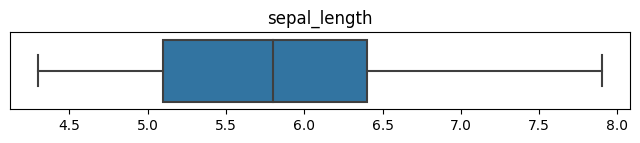

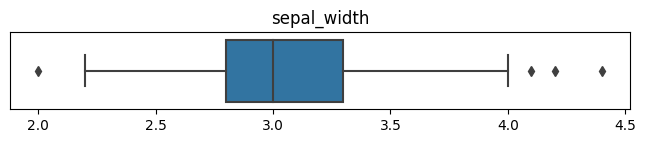

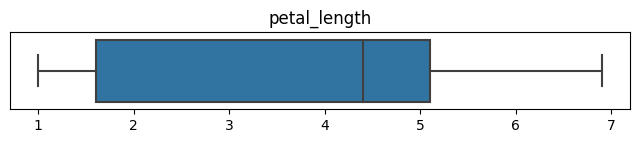

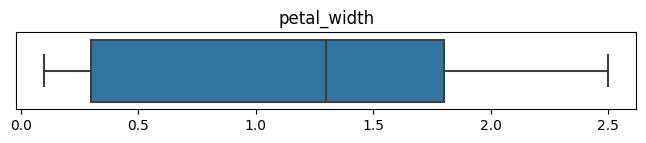

In [52]:

# Preparação Mínima
iris = iris.drop_duplicates()

# Estrutura de Dados para armazenar outliers_iris
outliers_iris = {}

# Identificando outliers_iris da base de dados Iris
print("Outliers IRIS (por Atributo):")
for column in col:
    Q1 = np.percentile(iris[column], 25)
    Q3 = np.percentile(iris[column], 75)
    IQR = np.abs(Q3 - Q1)
    superior = Q3 + 1.5*IQR
    inferior = Q1 - 1.5*IQR
    outliers_iris[column] = iris[column].loc[(iris[column] > superior) | (iris[column] < inferior)].tolist()
    print(f"{column}: {sorted(outliers_iris[column])}")

# Plotando Outliers
for column in col:
    plt.figure(figsize=(8,1))
    sns.boxplot(iris[column], orient='h')
    plt.title(column)
    plt.yticks([])
    plt.show()

# Exercício 4

In [53]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Fazer a requisição à URL e obter o conteúdo
response = req.get(url)
data = response.text

# Criar um DataFrame a partir dos dados
df = pd.read_csv(StringIO(data))

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
label_name = LabelEncoder()
label_sex = LabelEncoder()
label_cabin = LabelEncoder()
label_ticket = LabelEncoder()
label_embarked = LabelEncoder()

df['Name'] = label_name.fit_transform(df['Name'])
df['Sex'] = label_sex.fit_transform(df['Sex'])
df['Cabin'] = label_cabin.fit_transform(df['Cabin'])
df['Ticket'] = label_ticket.fit_transform(df['Ticket'])
df['Embarked'] = label_embarked.fit_transform(df['Embarked'])

In [56]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/home/filipe/Ambientes/DataPackages/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


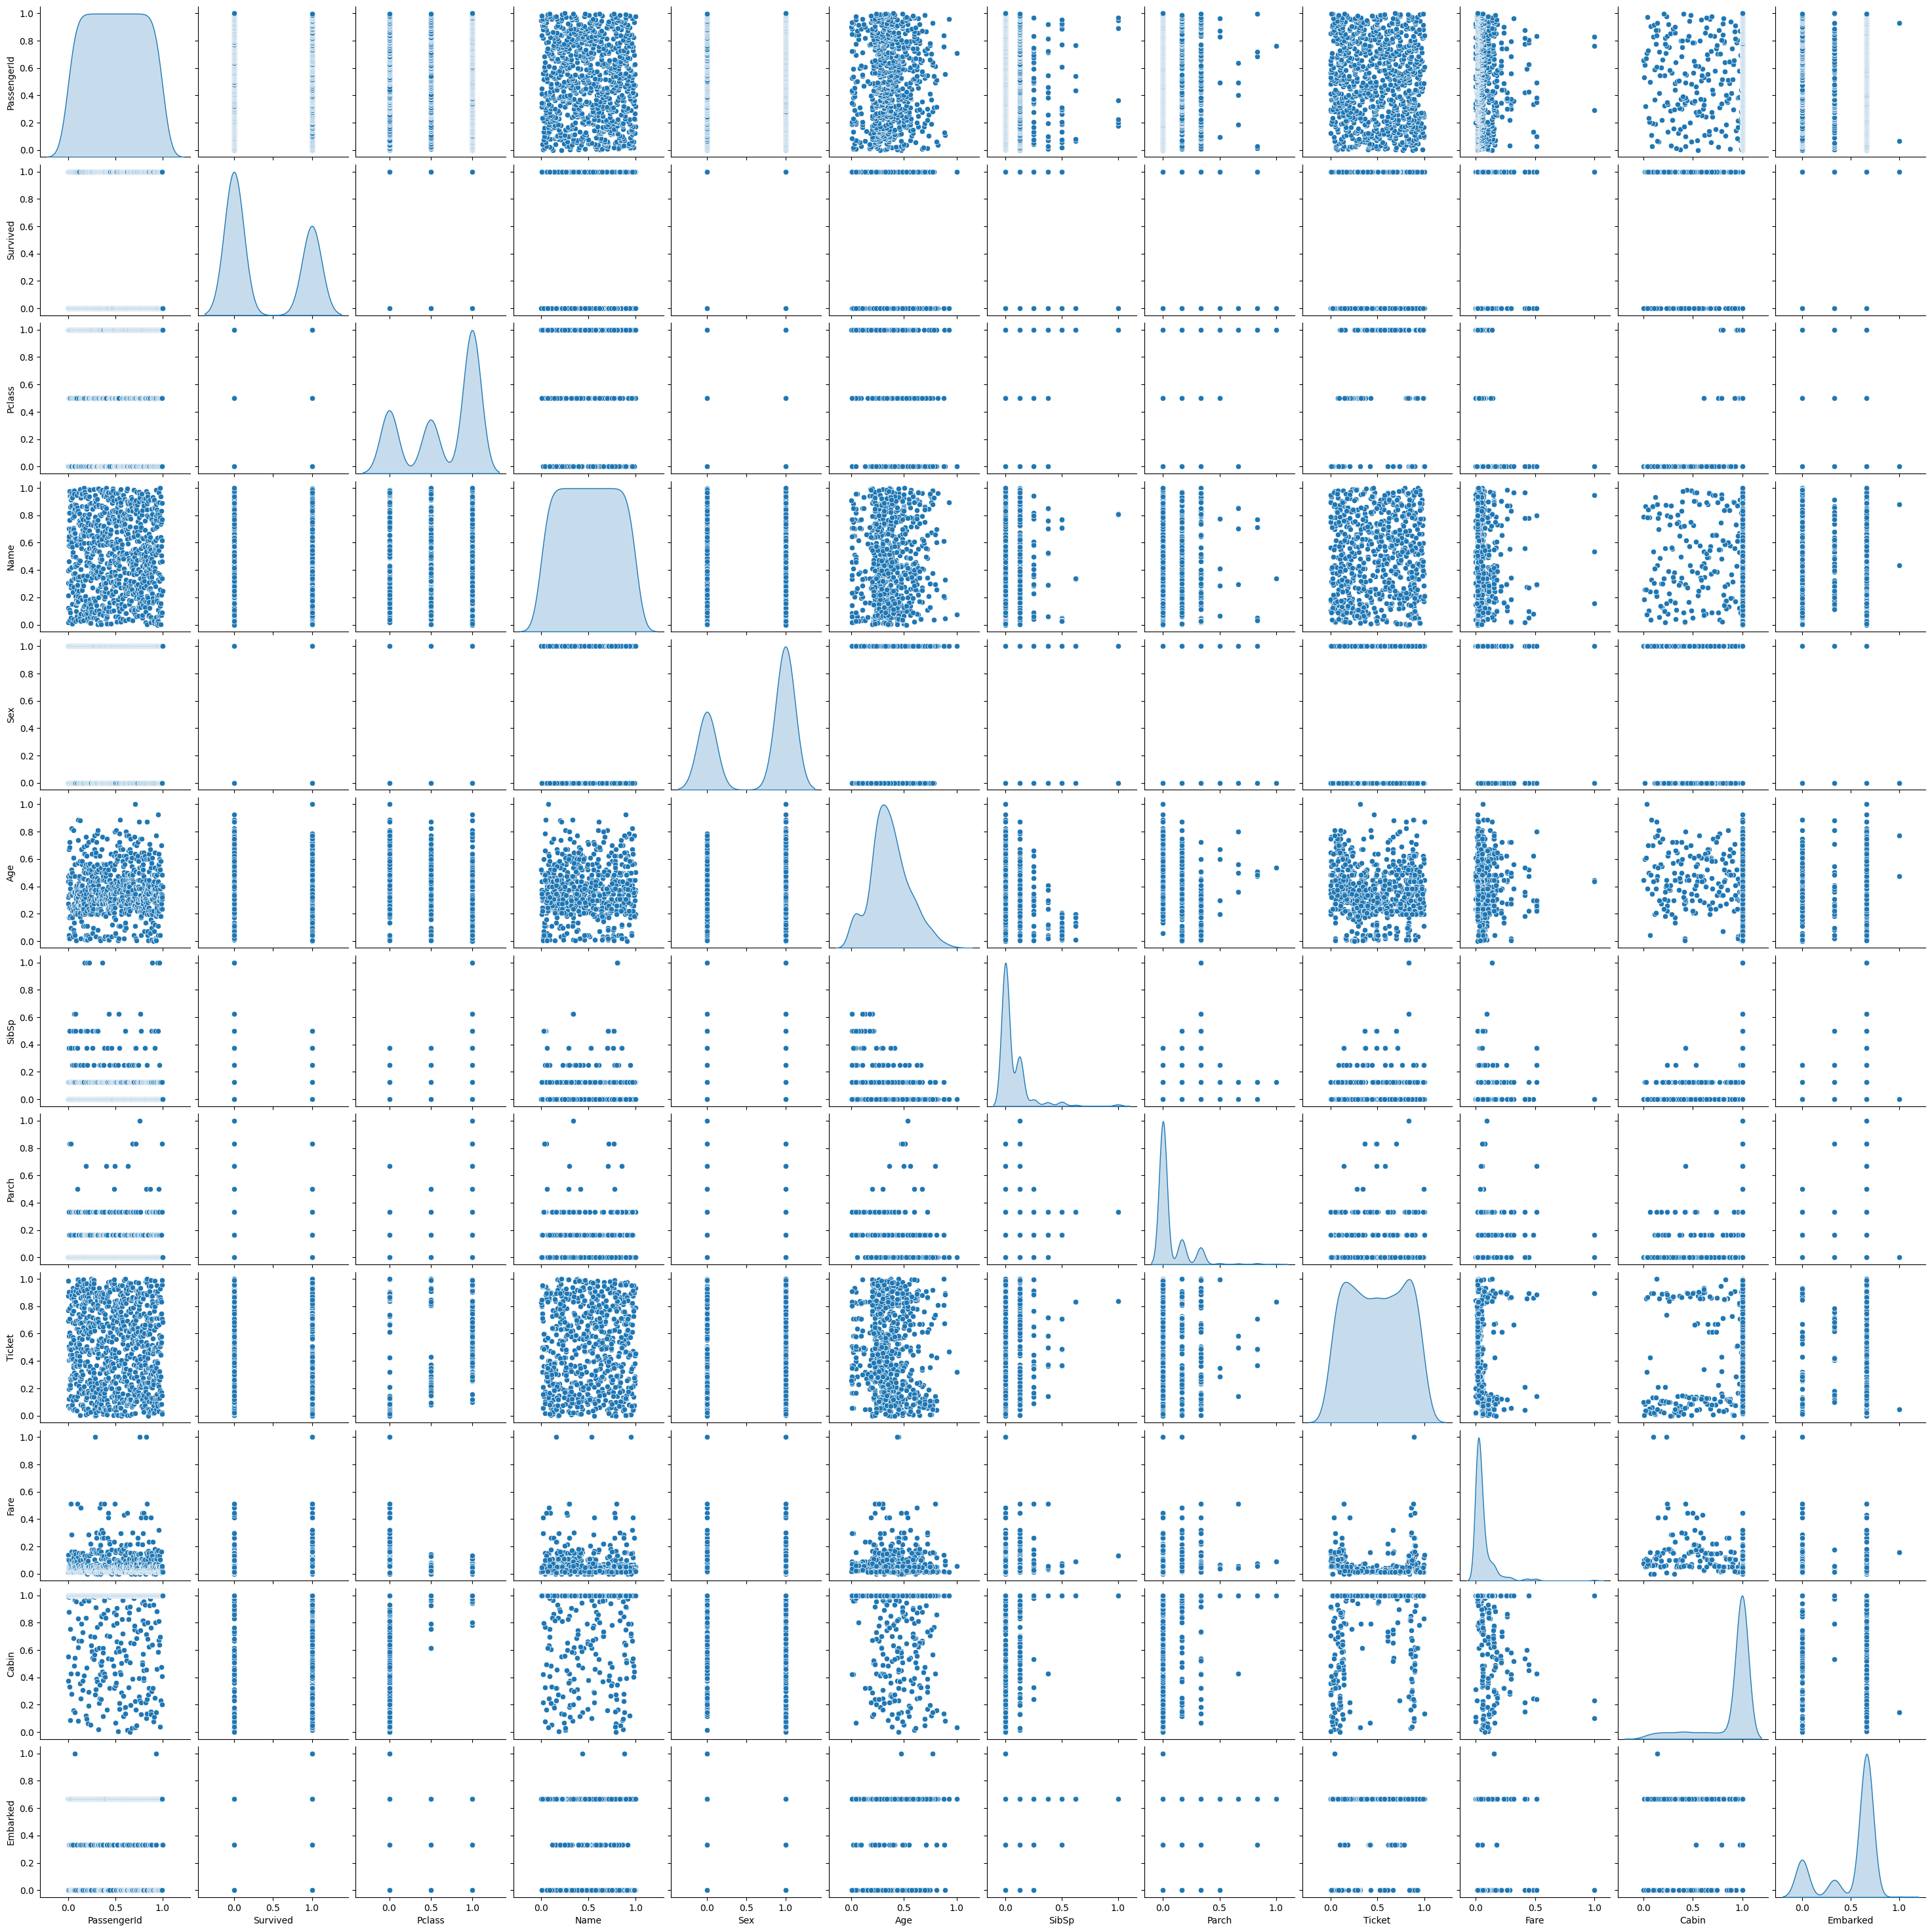

In [57]:
df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

# Plotando Gráfico de Densidade da Probabilidade na Diagonal
sns.pairplot(df, diag_kind='kde');

In [58]:
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.252331,-0.025252
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226


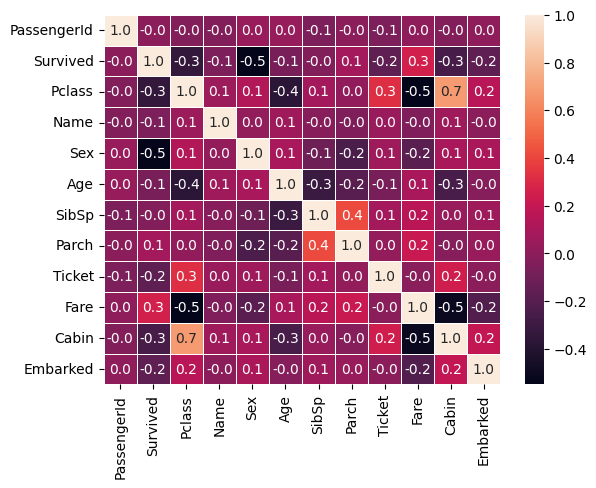

In [59]:
sns.heatmap(corr, annot=True, fmt=".1f", linewidth=.6);

Dentro das respostas do exercício, temos as seguintes opções:

a) Fare e Sex (-0.2); Cabin e SibSp (0.0) - Descartado (0.0)

b) SibSp e Parch (0.4); Fare e Survived (0.3) - Melhor resposta

c) Parch e Pclass (0.0); Sex e Name (0.0) - Descartado (0.0)

d) Fare e Ticket (0.0); Age e SibSp (-0.3) - Descartado (0.0)

e) Fare e Pclass (-0.5); Embarked e Name (0.0) - Descartado (0.0)

# Exercício 5

Teórico: d) Garantir que os dados estejam livres de erros, inconsistências e valores inválidos.